# Unit 5 - Financial Planning

In [21]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [22]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [23]:
# Set current amount of crypto assets
monthly_income = 120000
my_btc = 1.2
my_eth = 5.3

In [24]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [25]:
my_btc_value = requests.get(btc_url)
print(my_btc_value)


<Response [200]>


In [26]:
# Fetch current BTC price
#btc_url = btc_url + "?format=json"
btc_api_value = requests.get(btc_url).json()
btc_value = btc_api_value['data']['1']['quotes']['USD']['price']
# print(my_btc_value)

# Fetch current ETH price
eth_api_value = requests.get(eth_url).json()
eth_value = eth_api_value['data']['1027']['quotes']['USD']['price']
# print(my_eth_value)

# Compute current value of my crpto
my_btc_value = (my_btc * btc_value)
my_eth_value = (my_eth * eth_value)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $32320.80
The current value of your 5.3 ETH is $9498.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [27]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [28]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_secret_key = os.getenv('alpaca_secret_key')

# Create the Alpaca API object
alpaca_object = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [29]:
# Format current date as ISO format
current_date = pd.Timestamp('2023-05-03', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
current_close = alpaca_object.get_bars(tickers, timeframe, start = current_date).df

# Reorganize the DataFrame
# Separate ticker data
AGG = current_close[current_close['symbol'] == 'AGG'].drop('symbol', axis = 1)
SPY = current_close[current_close['symbol'] == 'SPY'].drop('symbol', axis = 1)


# Concatenate the ticker DataFrames
current_close = pd.concat([AGG, SPY], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
current_close.head()

AGG                                      \
                            open      high      low   close   volume   
timestamp                                                              
2023-05-03 04:00:00+00:00  99.89  100.1336  99.6901  100.09  5637205   
2023-05-04 04:00:00+00:00  99.77  100.4150  99.7500   99.97  5262191   
2023-05-05 04:00:00+00:00  99.64   99.7199  99.4542   99.65  3573546   
2023-05-08 04:00:00+00:00  99.21   99.3500  99.0801   99.10  5481594   
2023-05-09 04:00:00+00:00  99.11   99.1900  99.0100   99.01  5712210   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2023-05-03 04:00:00+00:00       29320   99.951368  411.36  413.87  407.7700   
2023-05-04 04:00:00+00:00       25183  100.098000  406.93  407.27  403.7400   
2023-05-05 04:00:00+00:00       17240   99.584323  408.91  413.72  408.6400   
2023-05-08 04:00:00+00:00       20167   99.199785  412.97  413.24  411.2800   
2023-05-09 04:00:00+00:00       22222   99.077911  411.13  412.09  410.6894   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-05-03 04:00:00+00:00  408.02  91577386      738928  410.586739  
2023-05-04 04:00:00+00:00  405.13  93756917      716760  405.493605  
2023-05-05 04:00:00+00:00  412.63  84115258      567933  411.191153  
2023-05-08 04:00:00+00:00  412.74  50053705      423103  412.511882  
2023-05-09 04:00:00+00:00  410.93  49220119      385994  411.356198

In [30]:
# Pick AGG and SPY close prices
agg_close_price = current_close['AGG']['close'][current_date]
spy_close_price = current_close['SPY']['close'][current_date]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.09
Current SPY closing price: $408.02


In [31]:
# Compute the current value of shares
my_spy_value = (spy_close_price * my_spy)
my_agg_value = (agg_close_price * my_agg)

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20401.00
The current value of your 200 AGG shares is $20018.00


### Savings Health Analysis

In [32]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# crypto_value = my_btc_value + my_eth_value
# shares_value = my_agg_value + my_spy_value
# assets_data_type = ['crypto', 'shares']

savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

# Create savings DataFrame
# df_savings = pd.DataFrame(index=[assets_data_type])
# df_savings['amount'] = [crypto_value, shares_value]
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

amount
crypto  41818.877
shares  40419.000

<Axes: ylabel='amount'>

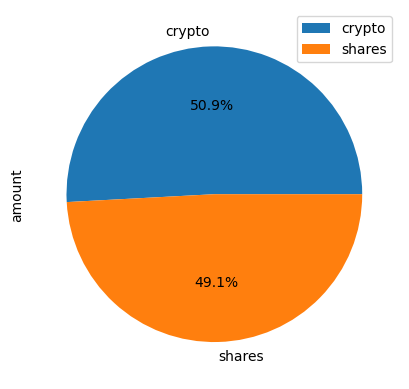

In [39]:
# Plot savings pie chart
labels = 'crypto', 'shares'
df_savings.plot.pie(
    y = 'amount',
    subplots = False,
    autopct = '%1.1f%%',
    labels = labels
)

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())


# print(emergency_fund)
# print(total_savings)

if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund')
elif total_savings == emergency_fund:
    print('Your savings matches your emergency fund')
else:
    print(f'You have ${emergency_fund - total_savings}:0.2f to go to meet your emergency fund goal')

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-03', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

tickers = ["SPY","AGG"]
timeframe = "1Day"

df_stock_data = alpaca_object.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   
2016-05-09 04:00:00+00:00  205.55  206.40  205.36  205.8892   74374922   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   
2016-05-09 04:00:00+00:00      263989  205.884750  111.11  111.1400  111.0050   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967  
2016-05-09 04:00:00+00:00  111.04  2173463       12416  111.070531

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [44]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   
2016-05-09 04:00:00+00:00  205.55  206.40  205.36  205.8892   74374922   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-03 04:00:00+00:00      377518  206.312060          NaN  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005574  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000195  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   
2016-05-09 04:00:00+00:00      263989  205.884750     0.000822  111.11   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   
2016-05-09 04:00:00+00:00  111.1400  111.0050  111.04  2173463       12416   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-03 04:00:00+00:00  110.865995          NaN  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530  
2016-05-09 04:00:00+00:00  111.070531     0.000631

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.001606   1.006323   1.010356   0.992127   0.995069   0.997301   
2      0.996727   1.007345   1.006247   0.984474   1.000211   1.002008   
3      0.984091   1.008723   1.006428   0.979858   0.992010   1.000846   
4      0.991440   1.010515   1.016513   0.975767   0.978406   1.004008   
...         ...        ...        ...        ...        ...        ...   
7556  24.846832  18.914633  21.377231  23.344130  22.734114  44.670019   
7557  24.566740  19.045092  21.613612  23.450696  22.799159  45.523099   
7558  24.295519  19.090911  21.524834  23.388299  22.673608  45.145872   
7559  24.401404  19.015361  21.319553  23.265584  22.433719  44.341448   
7560  24.313988  18.897520  21.358171  23.290729  22.286523  44.350044   

            6         7          8          9    ...       490        491  \
0      1.000000  1.000000   1.000000   1.000000  ...  1.000000   1.000000   
1      1.008686  0.998154   1.004968   1.000788  ...  0.991312   1.012260   
2      1.010091  1.003053   0.997702   1.011819  ...  0.987557   1.012769   
3      1.011142  1.001710   0.995157   1.026753  ...  0.988955   1.023022   
4      1.012803  0.992477   1.005070   1.038086  ...  0.975087   1.036711   
...         ...       ...        ...        ...  ...       ...        ...   
7556  32.670201  6.803944  23.707912  36.639185  ...  8.918311  14.163172   
7557  32.616959  6.814874  23.934768  36.397039  ...  8.918811  14.233624   
7558  31.996853  6.850075  24.046621  36.445138  ...  8.971942  14.161258   
7559  32.168847  6.915377  23.815625  36.768521  ...  9.074409  13.994882   
7560  32.080148  6.897801  23.917580  36.691504  ...  9.100750  14.030600   

           492        493        494        495        496        497  \
0     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1     1.003187   0.989821   0.998855   1.002256   0.993137   1.005948   
2     1.007061   0.998621   1.000170   1.005447   0.991612   1.006615   
3     1.007535   1.004279   1.003085   1.005464   0.979488   1.007087   
4     1.003600   0.998535   1.007246   1.005031   0.979059   1.004106   
...        ...        ...        ...        ...        ...        ...   
7556  4.928397  16.244635  12.158213  24.014726  32.930182  13.198671   
7557  4.942052  16.217925  12.133484  23.765175  33.001054  13.241644   
7558  4.957861  16.312410  12.208497  23.660850  33.379527  13.264899   
7559  4.982530  16.269965  12.478175  23.490884  33.808807  13.190687   
7560  4.999448  16.238617  12.449093  23.394816  34.058699  13.305425   

            498        499  
0      1.000000   1.000000  
1      1.005890   0.996202  
2      0.999323   0.995705  
3      1.008110   0.993625  
4      1.001676   0.989778  
...         ...        ...  
7556  25.148356  41.150846  
7557  25.445307  40.976847  
7558  25.397779  41.074424  
7559  25.732737  41.235053  
7560  25.691496  41.055067  

[7561 rows x 500 columns]

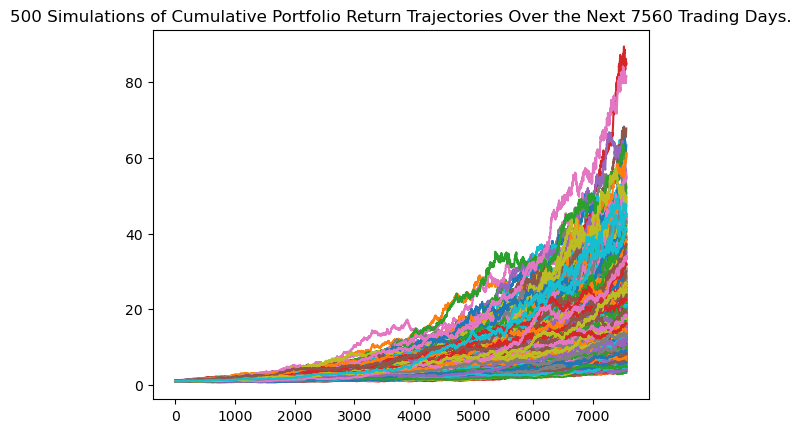

In [47]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

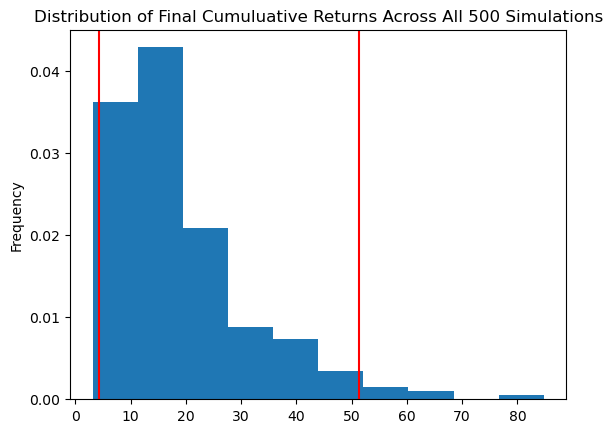

In [48]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()


### Retirement Analysis

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)


count           500.000000
mean             18.890935
std              12.664463
min               3.151692
25%              10.094048
50%              15.065397
75%              23.581540
max              84.754910
95% CI Lower      4.356415
95% CI Upper     51.388671
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [50]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87128.3 and $1027773.42


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [51]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130692.44 and $1541660.14


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.001799  1.000245  1.006243  0.995742  1.003219  0.998395  0.997985   
2     0.998289  1.000243  1.004284  0.996554  1.004502  0.993317  0.996037   
3     1.002639  0.997279  1.008339  0.992870  0.998657  0.989041  0.994189   
4     1.008853  0.996292  1.002813  0.995244  0.996794  0.990576  0.999322   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.438618  0.926659  1.048662  1.101424  1.134443  1.200987  1.347489   
1257  1.441785  0.926428  1.048574  1.104941  1.137374  1.204559  1.360843   
1258  1.444675  0.931714  1.053040  1.110206  1.140592  1.199869  1.358605   
1259  1.443488  0.934065  1.049921  1.108998  1.142538  1.203844  1.363563   
1260  1.446922  0.937697  1.053247  1.107388  1.138983  1.208412  1.364558   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.004253  1.002497  0.998947  ...  1.007121  1.004291  1.000334   
2     1.010316  1.000850  0.996382  ...  1.007016  1.003709  0.999542   
3     1.010062  0.999200  0.999132  ...  1.004156  1.002288  1.003976   
4     1.010897  0.989222  0.995257  ...  1.000057  1.007349  1.006909   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.257520  1.428939  1.194429  ...  1.104654  1.273680  1.276718   
1257  1.260661  1.429710  1.201055  ...  1.107447  1.269262  1.265880   
1258  1.254728  1.426409  1.207420  ...  1.101690  1.274683  1.281527   
1259  1.254192  1.425030  1.213366  ...  1.103902  1.276629  1.275813   
1260  1.243754  1.426672  1.217407  ...  1.103926  1.274986  1.281369   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000876  0.998973  1.001375  0.996477  1.002103  1.005063  0.995521  
2     1.001450  1.004142  1.004022  0.996702  1.004359  1.009205  0.999000  
3     0.994908  1.008989  1.004545  0.995074  1.010488  1.011124  1.002626  
4     0.990823  1.013085  1.002427  0.996293  1.007081  1.010369  0.998654  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.297344  1.229379  1.295593  1.501864  1.198438  1.386161  1.426163  
1257  1.296800  1.227049  1.297884  1.510874  1.190802  1.388448  1.427391  
1258  1.303255  1.227517  1.294870  1.503567  1.191945  1.388434  1.441467  
1259  1.296929  1.222773  1.285521  1.498580  1.192940  1.397786  1.440244  
1260  1.300069  1.223388  1.283023  1.500150  1.190080  1.398720  1.443262  

[1261 rows x 500 columns]

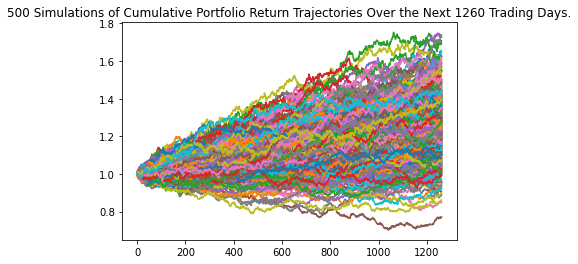

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

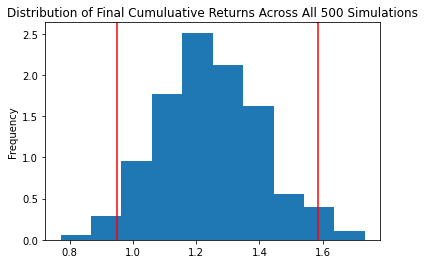

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004461  1.003269  0.998934  0.996767  1.000906  0.999279  0.995262   
2     1.007901  1.003304  0.993812  0.999973  1.000910  1.002347  0.996311   
3     1.007532  1.001077  0.990963  0.998339  1.001779  1.003653  0.994439   
4     1.020339  1.005743  0.991869  0.998218  1.005630  1.008717  0.987764   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.616922  1.761703  1.143430  1.687801  1.743826  1.174891  1.514199   
2517  1.620285  1.769184  1.145132  1.695693  1.742878  1.175745  1.517697   
2518  1.622141  1.771927  1.149019  1.691589  1.739420  1.178965  1.522624   
2519  1.628885  1.770207  1.149670  1.703935  1.738053  1.182429  1.519485   
2520  1.631015  1.770072  1.155133  1.716156  1.740688  1.184901  1.523516   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005752  0.993466  0.993655  ...  1.001427  1.004350  0.996932   
2     1.007234  0.993550  0.991021  ...  0.997379  1.001952  0.998124   
3     1.012230  0.999170  0.996484  ...  0.995265  1.001745  0.995332   
4     1.012750  0.999227  0.996474  ...  0.999028  1.004730  0.995357   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.447129  1.589765  1.570578  ...  1.316494  1.863650  1.727959   
2517  2.441471  1.586174  1.560826  ...  1.318463  1.857860  1.724003   
2518  2.444413  1.580680  1.566154  ...  1.317147  1.864694  1.727503   
2519  2.441360  1.565663  1.576607  ...  1.307985  1.858986  1.728039   
2520  2.451787  1.565796  1.574713  ...  1.302946  1.855886  1.730849   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.996844  0.997507  1.003457  0.998736  1.001195  0.999904  1.010218  
2     0.998063  1.001733  1.000273  0.994865  1.000109  0.994648  1.007838  
3     1.003023  1.003800  0.999755  0.997616  1.004730  0.993391  1.010444  
4     1.000204  1.008738  0.999273  0.999426  1.003776  0.991478  1.013379  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.411033  1.804671  1.500605  1.413278  1.552375  1.318340  1.960015  
2517  1.409092  1.810136  1.499466  1.413210  1.552539  1.316872  1.956776  
2518  1.419561  1.821212  1.492831  1.412283  1.556659  1.318842  1.961271  
2519  1.430017  1.814690  1.496851  1.409284  1.562660  1.324798  1.964190  
2520  1.424173  1.818980  1.496972  1.412152  1.565199  1.320461  1.969683  

[2521 rows x 500 columns]

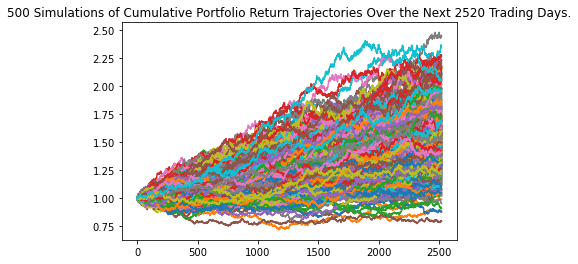

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

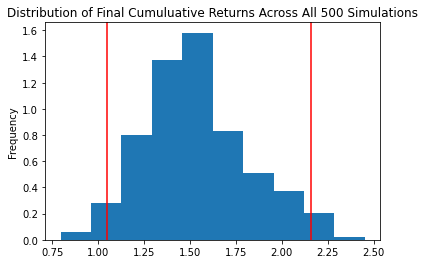

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
